<a href="https://colab.research.google.com/github/kajalpkh/kajalpkh.github.io/blob/main/final_assessment_kajal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install geopandas

Task 1: Read in the ECDC_surveillance_data file into a pandas dataframe called AMR_df.
Make sure that missing values (which in this file are indicated by a – character) are changed to NaNPrint out the column headings of the dataframe and the associated data types.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [6]:
AMR_df = pd.read_csv('/content/drive/MyDrive/ECDC_surveillance_data.csv')

In [7]:
AMR_df.replace('-', np.NaN)

,Unnamed: 0,Pathogen,Antimicrobial,Indicator,Unit,Time,RegionName,NumValue
0,0,Acinetobacter spp.,Aminoglycosides,"I - 'susceptible, increased exposure' isolates",N,2012,Austria,0.000000000
1,1,Acinetobacter spp.,Aminoglycosides,"I - 'susceptible, increased exposure' isolates",N,2012,Belgium,0.000000000
2,2,Acinetobacter spp.,Aminoglycosides,"I - 'susceptible, increased exposure' isolates",N,2012,Bulgaria,6.000000000
3,3,Acinetobacter spp.,Aminoglycosides,"I - 'susceptible, increased exposure' isolates",N,2012,Cyprus,0.000000000
4,4,Acinetobacter spp.,Aminoglycosides,"I - 'susceptible, increased exposure' isolates",N,2012,Czechia,0.000000000
...,...,...,...,...,...,...,...,...
72490,81154,Streptococcus pneumoniae,Penicillins,Total tested isolates,N,2021,Portugal,369.000000000
72491,81155,Streptococcus pneumoniae,Penicillins,Total tested isolates,N,2021,Romania,28.000000000
72492,81156,Streptococcus pneumoniae,Penicillins,Total tested isolates,N,2021,Sweden,668.000000000
72493,81157,Streptococcus pneumoniae,Penicillins,Total tested isolates,N,2021,Slovenia,187.000000000


In [8]:
print(AMR_df.columns.values, AMR_df.dtypes)

['Unnamed: 0' 'Pathogen' 'Antimicrobial' 'Indicator' 'Unit' 'Time'
 'RegionName' 'NumValue'] Unnamed: 0        int64
Pathogen         object
Antimicrobial    object
Indicator        object
Unit             object
Time              int64
RegionName       object
NumValue         object
dtype: object


Task 2: Print out the unique values of the Microbe, Antibacterial and Indicator columns

In [9]:
df = AMR_df.drop_duplicates(subset=['Pathogen','Antimicrobial','Indicator', 'Unit', 'Time', 'RegionName', 'NumValue'])
print(df)

       Unnamed: 0                  Pathogen    Antimicrobial  \
0               0        Acinetobacter spp.  Aminoglycosides   
1               1        Acinetobacter spp.  Aminoglycosides   
2               2        Acinetobacter spp.  Aminoglycosides   
3               3        Acinetobacter spp.  Aminoglycosides   
4               4        Acinetobacter spp.  Aminoglycosides   
...           ...                       ...              ...   
72490       81154  Streptococcus pneumoniae      Penicillins   
72491       81155  Streptococcus pneumoniae      Penicillins   
72492       81156  Streptococcus pneumoniae      Penicillins   
72493       81157  Streptococcus pneumoniae      Penicillins   
72494       81158  Streptococcus pneumoniae      Penicillins   

                                            Indicator Unit  Time RegionName  \
0      I - 'susceptible, increased exposure' isolates    N  2012    Austria   
1      I - 'susceptible, increased exposure' isolates    N  2012    Belgi

Task 3: With the help of the geopandas module (see final workshop) create a map of Europe (You can consider Europe as covering the area between longitude -30 to 40 and latitude 30 to 75) where countries are shaded by percentage of resistant isolates of meticillin resistant Staphylococcus aureus (MRSA) in 2019. Create a second map showing the incidence of carbapenem resistant Escherichia coli. in 2019. Comment on the output.  

In [10]:
MRSA_df=AMR_df[AMR_df['Antimicrobial'].isin(['Meticillin (MRSA)'])]
MRSA19_df=MRSA_df[MRSA_df['Time'].isin([2019])]
MRSA19_df1=MRSA19_df[MRSA19_df['Unit'].isin(['%'])]

In [11]:
MRSA19_df1['NumValue']=MRSA19_df1['NumValue'].astype(float)

<ipython-input-11-981e022cc5a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRSA19_df1['NumValue']=MRSA19_df1['NumValue'].astype(float)


<ipython-input-12-ce70cfaaa264>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  World=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


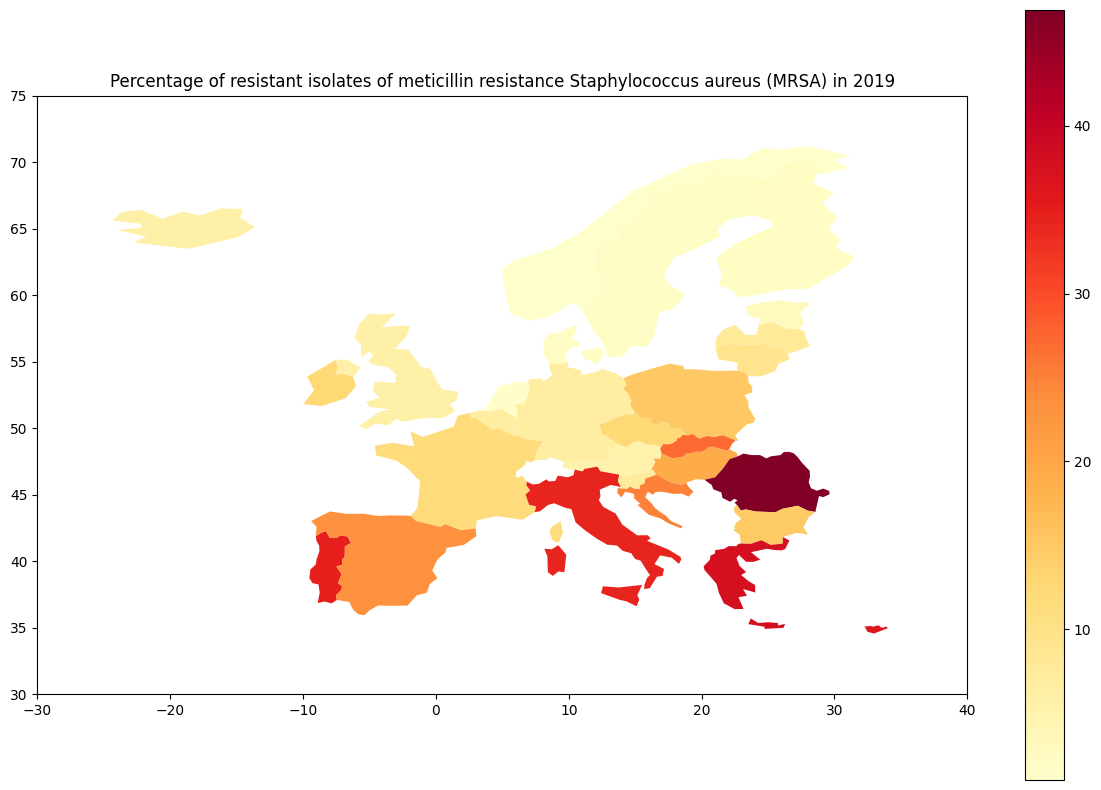

In [12]:
World=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
combine_df = World.merge(MRSA19_df1, how='left', left_on='name', right_on='RegionName')
combine_df.plot('NumValue', cmap='YlOrRd', figsize=(15,10), legend=True)
plt.title('Percentage of resistant isolates of meticillin resistance Staphylococcus aureus (MRSA) in 2019')
plt.xlim(-30, 40)
plt.ylim(30, 75)
plt.savefig('/content/drive/MyDrive/Python_assessment/task3_1.png')


In [13]:
Carb_df=AMR_df[AMR_df['Pathogen'].isin(['Escherichia coli'])]
Carb19_df=Carb_df[Carb_df['Time'].isin([2019])]
Carb19_df1=Carb19_df[Carb19_df['Unit'].isin(['%'])]
Carb19_df2=Carb19_df1[Carb19_df1['Antimicrobial'].isin(['Carbapenems'])]

In [14]:
Carb19_df2[Carb19_df2 == '-'] = np.nan
Carb19_df2['NumValue']=Carb19_df2['NumValue'].astype(float)

<ipython-input-14-f4018e524e10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carb19_df2[Carb19_df2 == '-'] = np.nan
<ipython-input-14-f4018e524e10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carb19_df2[Carb19_df2 == '-'] = np.nan
<ipython-input-14-f4018e524e10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carb

<ipython-input-15-f24d6e010986>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  World=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


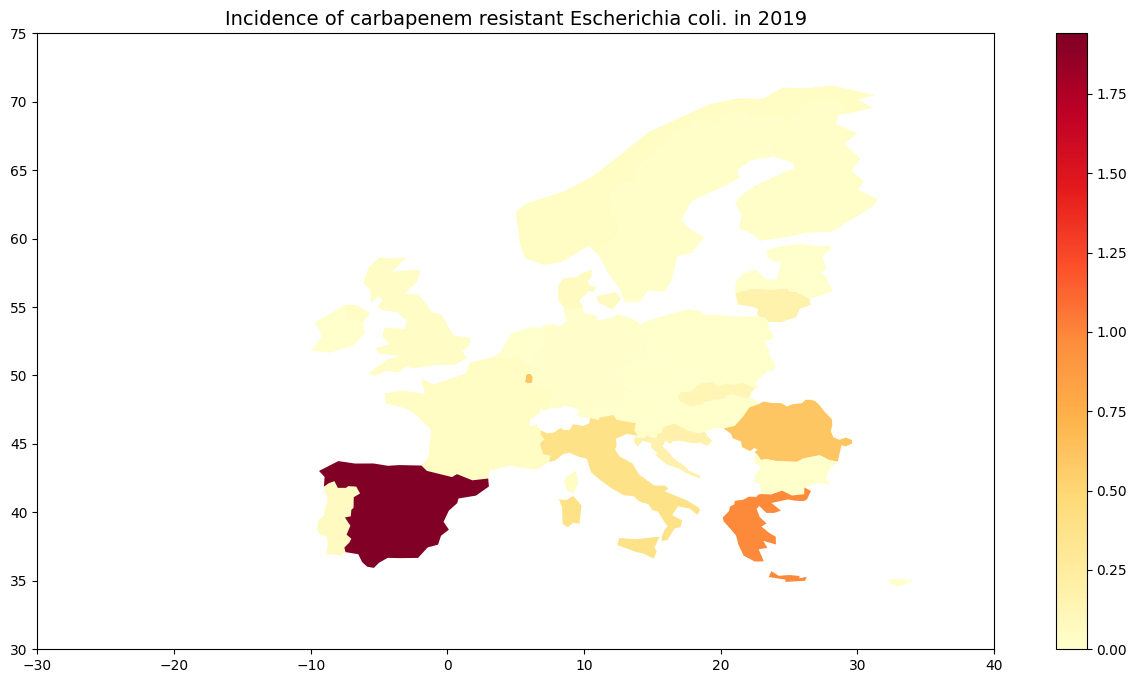

In [15]:
World=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
combine_df2 = World.merge(Carb19_df2, how='left', left_on='name', right_on='RegionName')
fig, ax= plt.subplots(figsize=(16,8))
combine_df2.plot('NumValue', ax=ax, cmap='YlOrRd', figsize=(16,10), legend=True)
plt.title('Incidence of carbapenem resistant Escherichia coli. in 2019', fontsize=14)
ax.set_xlim(-30, 40)
ax.set_ylim(30, 75)
plt.savefig('/content/drive/MyDrive/Python_assessment/task3_3.png')

**The first map shows that the percentage of resistant isolates of MRSA in 2019 was highest in Romania and lowest in Northern Europe. However, in comparison, the incidence of E coli. was highest in Spain. Similarly, the lowest countries were northern europe.**

Task 4: Determine the change in MRSA incidence rate between 2004 and 2019 for each country and create a map of Europe where countries are shaded by the change in incidence rate. Identify the country with the largest increase and the country with the largest decrease in MRSA incidence rate in this period. Comment on the results.


In [16]:
MRSA04_df=AMR_df[AMR_df['Antimicrobial'].isin(['Meticillin (MRSA)'])]
MRSA04_df3=MRSA04_df[MRSA04_df['Unit'].isin(['%'])]


In [17]:
MRSA2004=AMR_df[AMR_df['Antimicrobial'].isin(['Meticillin (MRSA)'])]
MRSA2004_df=MRSA2004[MRSA2004['Time'].isin([2004])]
MRSA2004_df1=MRSA2004_df[MRSA2004_df['Unit'].isin(['%'])]

In [18]:
MRSA2019=AMR_df[AMR_df['Antimicrobial'].isin(['Meticillin (MRSA)'])]
MRSA2019_df=MRSA2019[MRSA2019['Time'].isin([2019])]
MRSA2019_df1=MRSA2019_df[MRSA2019_df['Unit'].isin(['%'])]

In [19]:
MRSA2019_df1['NumValue']=MRSA2019_df1['NumValue'].astype(float)

<ipython-input-19-1b685c2cac48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MRSA2019_df1['NumValue']=MRSA2019_df1['NumValue'].astype(float)


In [20]:
merge_df = pd.concat([MRSA2004_df1, MRSA2019_df1])

In [21]:
table = merge_df.pivot_table('NumValue', index = ['Antimicrobial', 'Unit', 'RegionName'], columns= 'Time')
table['diff'] = table[2019]-table[2004]
print(table)


Time                                        2004       2019       diff
Antimicrobial     Unit RegionName                                     
Meticillin (MRSA) %    Austria         14.366197   5.206139  -9.160058
                       Belgium         33.251834   6.678082 -26.573752
                       Bulgaria        23.529412  14.814815  -8.714597
                       Croatia         37.500000  24.860335 -12.639665
                       Cyprus          48.717949  36.206897 -12.511052
                       Czechia          8.518006  12.523719   4.005714
                       Denmark          1.253482   2.209945   0.956463
                       Estonia          4.807692   3.005464  -1.802228
                       Finland          3.061224   2.264456  -0.796768
                       France          28.592770  11.628267 -16.964503
                       Germany         19.529837   6.686192 -12.843645
                       Greece          44.334975  37.647059  -6.687917
      

<ipython-input-22-67c564bcca9a>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  World=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


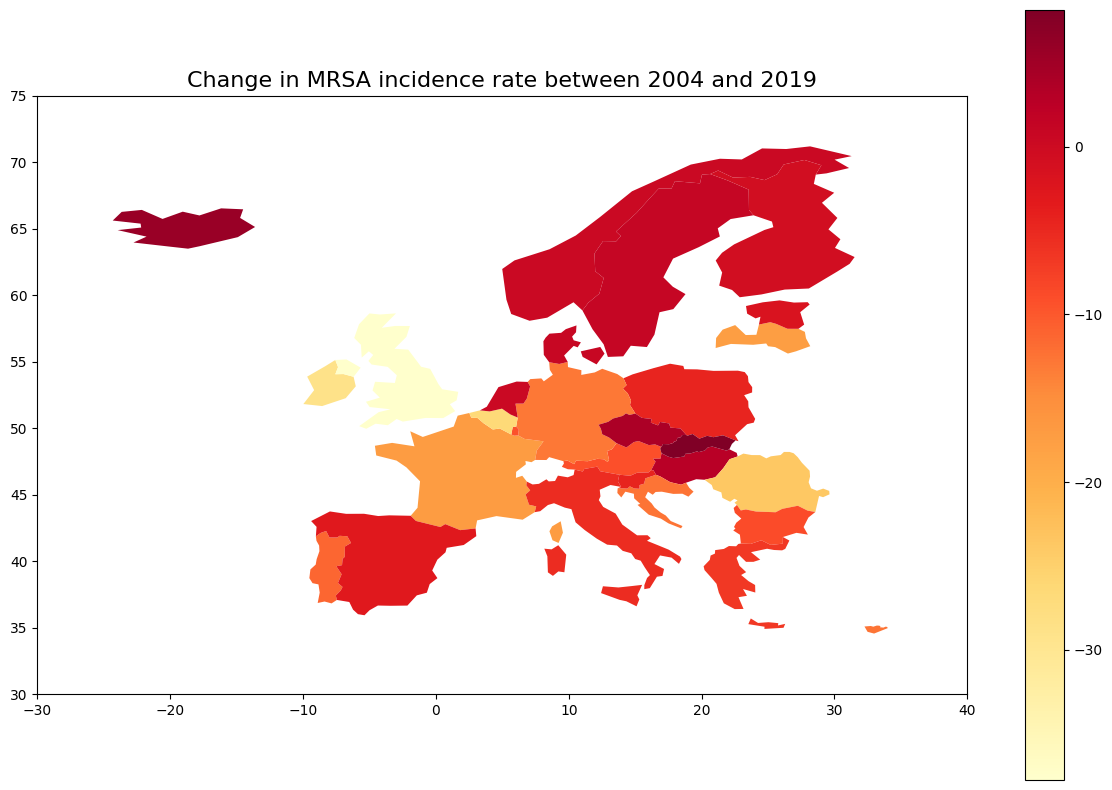

In [22]:
from pandas.core.reshape.pivot import pivot_table
World=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
combine_df2 = World.merge(table, how='left', left_on='name', right_on='RegionName' )
combine_df2.plot('diff', cmap='YlOrRd', figsize=(15,10), legend=True)
plt.title('Change in MRSA incidence rate between 2004 and 2019', fontsize=16)
plt.xlim(-30, 40)
plt.ylim(30, 75)
plt.savefig('/content/drive/MyDrive/Python_assessment/task4.png')

**The country which had the largest decrease in the incidence of MRSA was the United Kingdom and the country which had the largest increase was Slovakia. The results show that most countries have shown a decrease in the incidence rate, however, countries is eastern and southern europe have either had very little decrease or a slight increase. The overall incidence rate for Europe is a decrease.**

Task 5: For each of your assigned microbes and countries create a plot that shows how the incidence rate of resistance to the different antimicrobials changes in the period from 2000 to 2021. Comment on the outputs.

In [23]:
Acin=AMR_df[AMR_df['Pathogen'].isin(['Acinetobacter spp.'])]
Acin2000_df=Acin[Acin['Time'].isin([2012])]
Acin2000_df0 =Acin2000_df[Acin2000_df['RegionName'].isin(['Cyprus', 'France', 'Czechia'])]
Acin2000_df1=Acin2000_df0[Acin2000_df0['Unit'].isin(['%'])]

In [24]:
Acin2021=AMR_df[AMR_df['Pathogen'].isin(['Acinetobacter spp.'])]
Acin2021_df=Acin2021[Acin2021['Time'].isin([2021])]
Acin2021_df0 =Acin2021_df[Acin2021_df['RegionName'].isin(['Cyprus', 'France', 'Czechia'])]
Acin2021_df1=Acin2021_df0[Acin2021_df0['Unit'].isin(['%'])]

In [25]:
Acin_merge =pd.concat([Acin2000_df1, Acin2021_df1])
Acin_merge1=Acin_merge.drop(columns=['Unnamed: 0', 'Pathogen', 'Antimicrobial', 'Indicator', 'Unit'])
print(Acin_merge1)

      Time RegionName      NumValue
599   2012     Cyprus  52.173913040
600   2012    Czechia             -
607   2012     France  12.949640280
2089  2012     Cyprus  56.521739130
2090  2012    Czechia             -
2097  2012     France   3.341902310
3281  2012     Cyprus  47.826086950
3282  2012    Czechia             -
3289  2012     France   4.044117640
4473  2012     Cyprus  56.521739130
4474  2012    Czechia             -
4481  2012     France  15.584415580
868   2021     Cyprus  89.719626160
869   2021    Czechia  50.819672130
876   2021     France   6.092124810
2358  2021     Cyprus  92.129629620
2359  2021    Czechia  53.278688520
2366  2021     France   3.055555550
3550  2021     Cyprus  88.785046720
3551  2021    Czechia  50.819672130
3558  2021     France   2.396166130
4742  2021     Cyprus  91.666666660
4743  2021    Czechia  53.278688520
4750  2021     France   7.142857140


In [26]:
table1 = Acin_merge.pivot_table('NumValue', index = ['RegionName'], columns='Time', aggfunc='max')
table3= table1.replace('-', np.NaN)
print(table1)


Time                2012          2021
RegionName                            
Cyprus      56.521739130  92.129629620
Czechia                -  53.278688520
France       4.044117640   7.142857140


In [27]:
table_1=table3.astype(float)



In [28]:
strep=AMR_df[AMR_df['Pathogen'].isin(['Streptococcus pneumoniae'])]
strep2000_df=strep[strep['Time'].isin([2005])]
strep2000_df0 =strep2000_df[strep2000_df['RegionName'].isin(['Cyprus', 'France', 'Czechia'])]
strep2000_df1=strep2000_df0[strep2000_df0['Unit'].isin(['%'])]

In [29]:
strep1=AMR_df[AMR_df['Pathogen'].isin(['Streptococcus pneumoniae'])]
strep2021_df=strep1[strep1['Time'].isin([2021])]
strep2021_df0 =strep2021_df[strep2021_df['RegionName'].isin(['Cyprus', 'France', 'Czechia'])]
strep2021_df1=strep2021_df0[strep2021_df0['Unit'].isin(['%'])]

In [30]:
strep_merge =pd.concat([strep2000_df1, strep2021_df1])

In [31]:
table2 = strep_merge.pivot_table(values='NumValue', index = ['RegionName'], columns='Time', aggfunc='max')
print(table2)

Time                2005          2021
RegionName                            
Cyprus                 -             -
Czechia      3.608247420   5.701754380
France      40.506329110  31.964152350


In [32]:
mergetable2 = table_1.merge(table2, how='outer', left_on='RegionName', right_on='RegionName')
mergetable2[mergetable2 == '-'] = np.nan
mergetable2=mergetable2.astype(float)
print(mergetable2)

Time             2012     2021_x       2005     2021_y
RegionName                                            
Cyprus      56.521739  92.129630        NaN        NaN
Czechia           NaN  53.278689   3.608247   5.701754
France       4.044118   7.142857  40.506329  31.964152


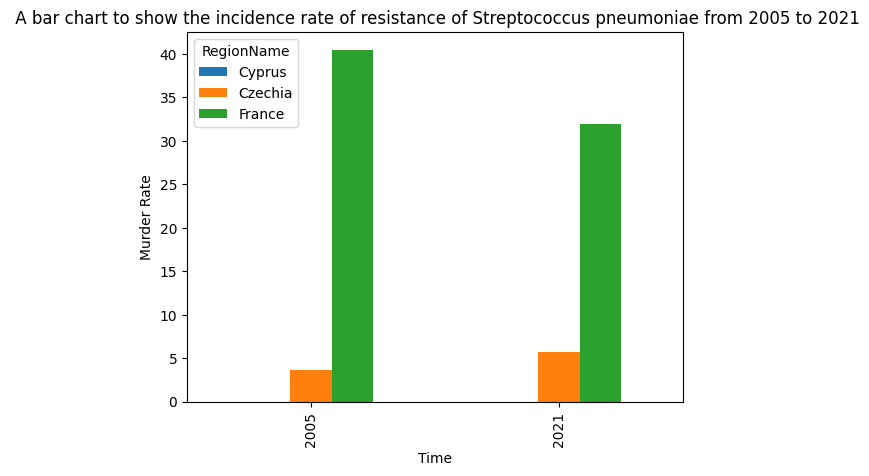

In [33]:
table2[table2 == '-'] = np.nan
table2=table2.astype(float)
ax = table2.T.plot(kind='bar', ylabel='Murder Rate', title=' A bar chart to show the incidence rate of resistance of Streptococcus pneumoniae from 2005 to 2021')
plt.savefig('/content/drive/MyDrive/Python_assessment/task5_strep.png')

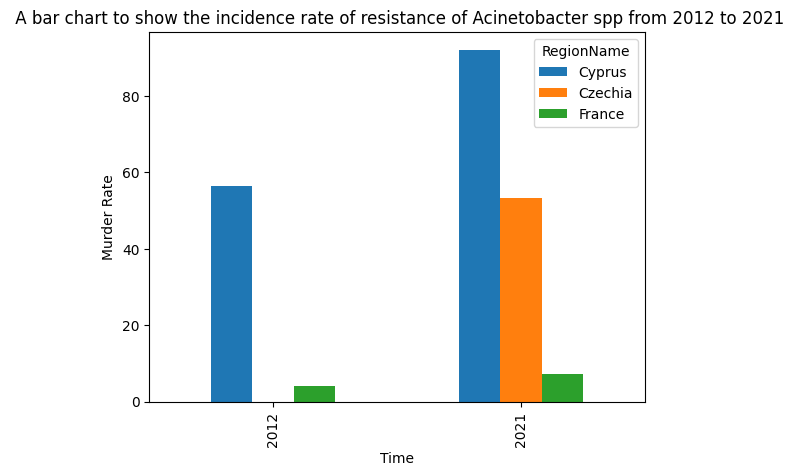

In [34]:
table1[table1 == '-'] = np.nan
table1=table1.astype(float)
ax = table1.T.plot(kind='bar', ylabel='Murder Rate', title=' A bar chart to show the incidence rate of resistance of Acinetobacter spp from 2012 to 2021')
plt.savefig('/content/drive/MyDrive/Python_assessment/task5_Acin.png')

**The bar chart demonstrates how the incidece rate of Streptococcus pneumoniae and Acinetobacter spp has changed from 2000 (or the earliest year the data that was provided for) to 2021. As seen in the graph for Streptococcus pneumoniae, there has not been much of a difference from 2005 to 2021 and there is no data given for Cyprus. There has been a slight increase in the incidence rate for Czechia and a slight decrease for France. For Acinetobacter spp, we can see that there is no date given for Czechia in 2012 , but it is the second highest in 2021. There has been a significant increase in the incidence rate for Cyprus and a slight increase for France.**

Task 6: One feature in combating AMR may be the amount of testing performed.  Calculate the total number of tests carried out in each year in each country.  Using the population data available from the natural earth data set within geopandas calculate the number of tests per 10,000 population in each country (testing rate). You may assume the population is constant throughout the period.  
Create a plot showing how testing rates have changed over time in each country and report which country has the highest testing rate and which the lowest in 2021. Comment on the outputs.


In [35]:
tests_df= AMR_df[AMR_df['Indicator'].isin(['Total tested isolates'])]

tests_df['NumValue']=tests_df['NumValue'].astype(float)




<ipython-input-35-611ae7927ec9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests_df['NumValue']=tests_df['NumValue'].astype(float)


In [36]:
World3=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
World3['pop_est']=World3['pop_est'].astype(float)


world3_df = World3.merge(tests_df, how='left', left_on='name', right_on='RegionName')


<ipython-input-36-8dd1d0a3eadf>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  World3=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [37]:
 world3_df.pivot_table(values=['NumValue', 'pop_est'], index = ['RegionName'], columns=['Indicator', 'Time'], aggfunc='sum', margins = True)


NumValue                                         \
Indicator      Total tested isolates                                          
Time                          2000.0   2001.0    2002.0    2003.0    2004.0   
RegionName                                                                    
Austria                        382.0   1647.0    3485.0    7162.0   13334.0   
Belgium                        657.0   1939.0    6491.0    7530.0    8782.0   
Bulgaria                       102.0    695.0     997.0    1202.0    1308.0   
Croatia                          NaN   1319.0    3488.0    4026.0    3935.0   
Cyprus                           NaN      NaN       NaN     205.0     429.0   
Czechia                        515.0   8459.0   10858.0   12068.0   13243.0   
Denmark                        501.0    520.0     752.0     671.0    1436.0   
Estonia                          5.0    410.0     477.0     706.0    1234.0   
Finland                        367.0   7544.0    8591.0    9098.0   11172.0   
France                           NaN   1714.0   17034.0   15912.0   38062.0   
Germany                       1846.0   8142.0    7174.0    6796.0    9141.0   
Greece                        2877.0   4204.0    4423.0    8358.0    8684.0   
Hungary                          NaN   1908.0    2763.0    6402.0    7534.0   
Iceland                         40.0    605.0     577.0     693.0     826.0   
Ireland                        511.0    643.0    5762.0    7618.0    9359.0   
Italy                          470.0   1608.0    5943.0    7809.0    6038.0   
Latvia                           NaN      NaN       NaN       NaN      87.0   
Lithuania                        NaN      NaN       NaN       NaN       NaN   
Luxembourg                      67.0   1266.0    1193.0    1507.0    1428.0   
Netherlands                   7604.0  10777.0   15066.0   13804.0   12392.0   
Norway                        5080.0   5459.0    6604.0    7072.0    7681.0   
Poland                           NaN    795.0    1016.0     969.0    1376.0   
Portugal                       151.0   2893.0    2904.0    6013.0    5826.0   
Romania                          NaN      NaN     262.0     398.0     376.0   
Slovakia                         NaN    309.0    1707.0    1827.0    2123.0   
Slovenia                       152.0   2422.0    2584.0    2727.0    3832.0   
Spain                          857.0  10535.0   16669.0   18364.0   24002.0   
Sweden                        1481.0  11637.0   13395.0   17953.0   19562.0   
United Kingdom                1419.0   7636.0   10502.0   13946.0   13149.0   
All                          25084.0  95086.0  150717.0  180836.0  226351.0   

                                                                  ...  \
Indicator                                                         ...   
Time              2005.0    2006.0    2007.0    2008.0    2009.0  ...   
RegionName                                                        ...   
Austria          15902.0   22133.0   22757.0   27656.0   25267.0  ...   
Belgium          11831.0   11463.0   11019.0   11025.0   13633.0  ...   
Bulgaria          1951.0    1979.0    1311.0    1616.0    2285.0  ...   
Croatia           5716.0    7760.0    8802.0    9689.0       NaN  ...   
Cyprus             743.0    1120.0    1464.0    1655.0    1799.0  ...   
Czechia          18254.0   21222.0   24648.0   30095.0   30137.0  ...   
Denmark           8782.0   17474.0   22249.0   26996.0   28160.0  ...   
Estonia           1693.0    2091.0    2247.0    2589.0    2861.0  ...   
Finland          13967.0   15416.0   16307.0   17805.0   18914.0  ...   
France           52022.0   56821.0   69505.0   67142.0   75222.0  ...   
Germany           9093.0    8746.0   10544.0   13750.0   25081.0  ...   
Greece           17333.0   19549.0   20255.0   23037.0   29450.0  ...   
Hungary          12913.0   13567.0   14090.0   13815.0   13785.0  ...   
Iceland           1140.0    1123.0     994.0    1069.0    1106.0  ...   
Ireland          11983.0   

In [38]:
tests_df2 = AMR_df[AMR_df['Indicator'].isin(['Total tested isolates'])]

tests_df2['NumValue']=tests_df['NumValue'].astype(float)


<ipython-input-38-cd396a4825d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests_df2['NumValue']=tests_df['NumValue'].astype(float)


In [39]:
number_of_tests = tests_df2.groupby(['RegionName', 'Time']).sum()

print(number_of_tests)

                     Unnamed: 0  NumValue
RegionName     Time                      
Austria        2000      382033     382.0
               2001      382250    1647.0
               2002      382587    3485.0
               2003      382938    7162.0
               2004      383301   13334.0
...                         ...       ...
United Kingdom 2015     1203637   47243.0
               2016     1204537  188347.0
               2017     1205437  246025.0
               2018     1206337  254557.0
               2019     1207237  241072.0

[635 rows x 2 columns]


<ipython-input-39-b64ccb422902>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_of_tests = tests_df2.groupby(['RegionName', 'Time']).sum()


In [40]:
World5=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
World5['pop_est']=World5['pop_est'].astype(float)


world5_df = World5.merge(number_of_tests, how='right', left_on='name', right_on='RegionName')



<ipython-input-40-4f4e86b5665f>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  World5=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [41]:
world5_df['Test Rate']=(world5_df['NumValue']*10000/world5_df['pop_est'])
print(world5_df)

        pop_est continent            name iso_a3  gdp_md_est  \
0     8877067.0    Europe         Austria    AUT    445075.0   
1     8877067.0    Europe         Austria    AUT    445075.0   
2     8877067.0    Europe         Austria    AUT    445075.0   
3     8877067.0    Europe         Austria    AUT    445075.0   
4     8877067.0    Europe         Austria    AUT    445075.0   
..          ...       ...             ...    ...         ...   
630  66834405.0    Europe  United Kingdom    GBR   2829108.0   
631  66834405.0    Europe  United Kingdom    GBR   2829108.0   
632  66834405.0    Europe  United Kingdom    GBR   2829108.0   
633  66834405.0    Europe  United Kingdom    GBR   2829108.0   
634  66834405.0    Europe  United Kingdom    GBR   2829108.0   

                                              geometry  Unnamed: 0  NumValue  \
0    POLYGON ((16.97967 48.12350, 16.90375 47.71487...      382033     382.0   
1    POLYGON ((16.97967 48.12350, 16.90375 47.71487...      382250    1

In [42]:
world5_df.index=number_of_tests.index
number_of_tests['Test Rate']=world5_df['Test Rate']
number_of_tests=number_of_tests.drop(columns=['NumValue'])
print(number_of_tests)

                     Unnamed: 0  Test Rate
RegionName     Time                       
Austria        2000      382033   0.430322
               2001      382250   1.855343
               2002      382587   3.925846
               2003      382938   8.067980
               2004      383301  15.020727
...                         ...        ...
United Kingdom 2015     1203637   7.068665
               2016     1204537  28.181144
               2017     1205437  36.811130
               2018     1206337  38.087718
               2019     1207237  36.070045

[635 rows x 2 columns]


In [43]:
numberoftests = number_of_tests.pivot_table(values=['Test Rate'], index = ['Time'], columns='RegionName')

In [44]:
print(numberoftests)

            Test Rate                                                        \
RegionName    Austria    Belgium  Bulgaria    Croatia     Cyprus    Czechia   
Time                                                                          
2000         0.430322   0.572098  0.146221        NaN        NaN   0.482675   
2001         1.855343   1.688428  0.996307   3.242778        NaN   7.928051   
2002         3.925846   5.652185  1.429235   8.575292        NaN  10.176472   
2003         8.067980   6.556917  1.723109   9.897972   1.710364  11.310524   
2004        15.020727   7.647125  1.875064   9.674247   3.579250  12.411772   
2005        17.913574  10.302110  2.796827  14.052858   6.199028  17.108245   
2006        24.932785   9.981666  2.836966  19.078058   9.344430  19.889952   
2007        25.635720   9.595043  1.879365  21.639828  12.214505  23.100911   
2008        31.154434   9.600268  2.316593  23.820529  13.808064  28.206018   
2009        28.463230  11.871242  3.275628        Na

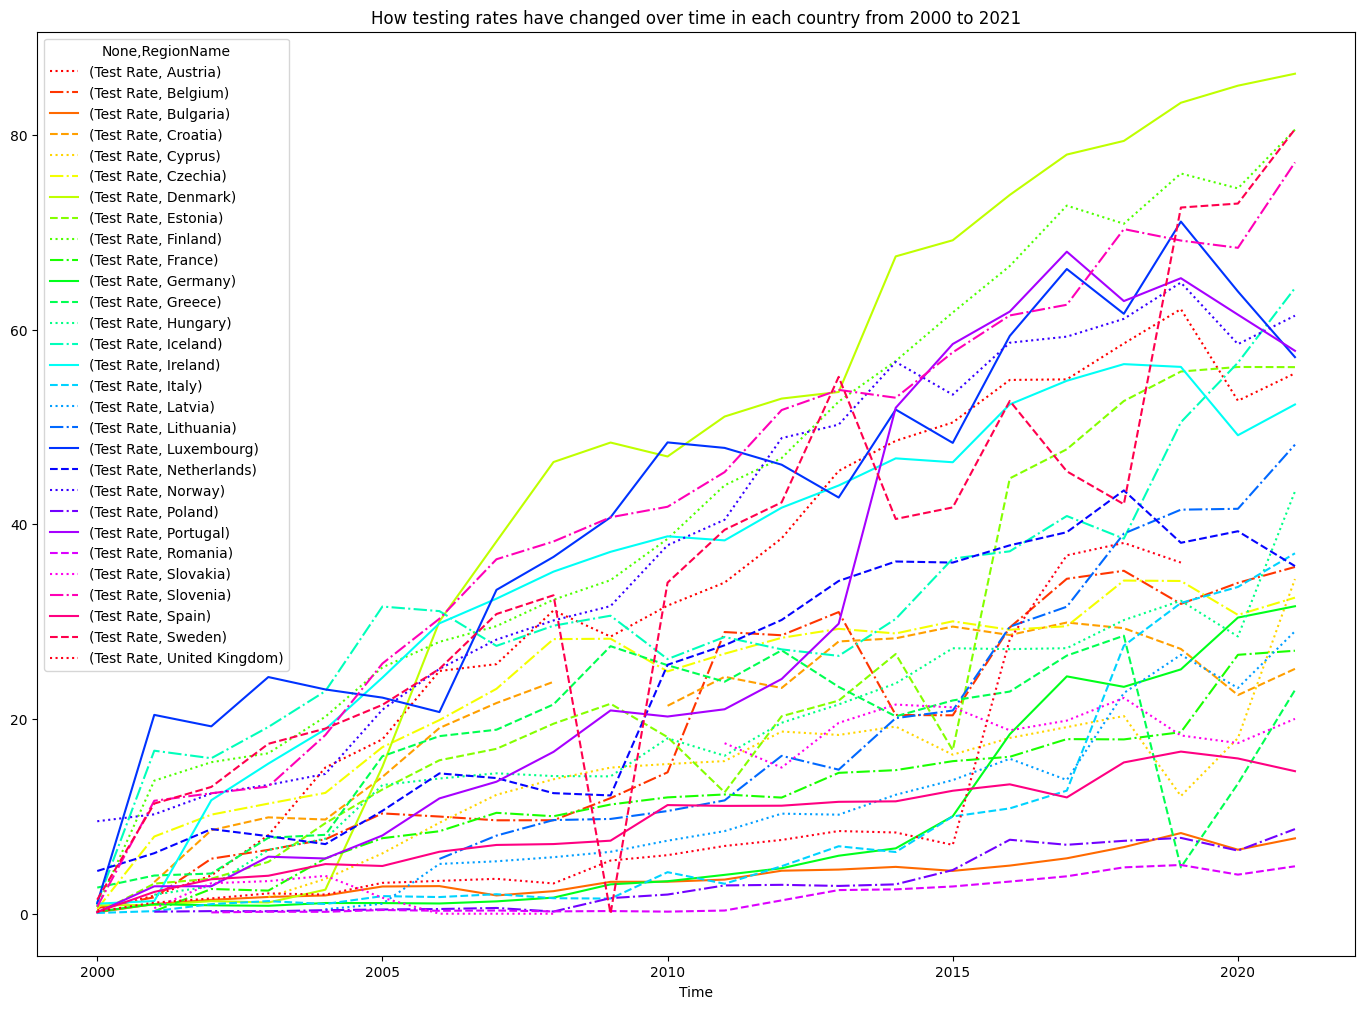

In [45]:
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('linestyle', [':', '-.', '-', '--'])))

fig, ax= plt.subplots(figsize=(16,8))
numberoftests.plot(ax=ax, cmap='hsv', figsize=(17,12), legend=True, title=('How testing rates have changed over time in each country from 2000 to 2021'))

fig.savefig('/content/drive/MyDrive/Python_assessment/task6.png')


**The graph shows that the country with the highest testing rate is Denmark, and the country with the lowest testing rate is Romania. We can see that since 2000, there has not been a massive difference in the testing rate for Romania and it has stayed relatively consistent. In comparison, Denmark has increased its testing rate significantly, from being almost the lowest in 2000 and dramatically increasing to the highest in 2021.**

In [46]:
import seaborn as sns

In [47]:
numberoftests = numberoftests.reset_index(drop=True)

Task 7: One factor affecting the amount of testing performed may be the wealth of the country.  The natural earth dataset also contains the total GDP of each country.  Calculate the GDP per capita for each country.
Create a Seaborn pairplot that shows the correlation between the values of testing rate in 2019, GDP per capita and MRSA resistance rates.  Comment on the results.


In [48]:
gdp= World5.pivot_table(values= ['gdp_md_est','pop_est'], index=['name'])
gdp['gdp_per_capita']= (gdp['gdp_md_est']/gdp['pop_est'])

print(gdp)

             gdp_md_est     pop_est  gdp_per_capita
name                                               
Afghanistan       19291  38041754.0        0.000507
Albania           15279   2854191.0        0.005353
Algeria          171091  43053054.0        0.003974
Angola            88815  31825295.0        0.002791
Antarctica          898      4490.0        0.200000
...                 ...         ...             ...
W. Sahara           907    603253.0        0.001504
Yemen             22581  29161922.0        0.000774
Zambia            23309  17861030.0        0.001305
Zimbabwe          21440  14645468.0        0.001464
eSwatini           4471   1148130.0        0.003894

[177 rows x 3 columns]


In [49]:
testrate_2019=numberoftests.iloc[19]
testrate_2019 = testrate_2019.to_frame().reset_index()
testrate_2019 = testrate_2019.drop(columns=['level_0'])
testrate_2019['testrate']=testrate_2019[19]
print(testrate_2019)
testrate_2019.columns


        RegionName         19   testrate
0          Austria  62.101593  62.101593
1          Belgium  31.818900  31.818900
2         Bulgaria   8.285834   8.285834
3          Croatia  27.196066  27.196066
4           Cyprus  12.089356  12.089356
5          Czechia  34.178064  34.178064
6          Denmark  83.299061  83.299061
7          Estonia  55.691661  55.691661
8          Finland  76.033718  76.033718
9           France  18.646617  18.646617
10         Germany  25.097555  25.097555
11          Greece   4.760962   4.760962
12         Hungary  32.147558  32.147558
13         Iceland  50.482546  50.482546
14         Ireland  56.167792  56.167792
15           Italy  31.918460  31.918460
16          Latvia  26.594674  26.594674
17       Lithuania  41.502144  41.502144
18      Luxembourg  71.092570  71.092570
19     Netherlands  38.101062  38.101062
20          Norway  64.832974  64.832974
21          Poland   7.789128   7.789128
22        Portugal  65.276344  65.276344
23         Roman

Index(['RegionName', 19, 'testrate'], dtype='object')

In [50]:
MRSA=MRSA2019_df1.pivot_table('NumValue', index='RegionName')
MRSA['MRSA2019']=MRSA['NumValue']
print(MRSA)
MRSA.columns

                 NumValue   MRSA2019
RegionName                          
Austria          5.206139   5.206139
Belgium          6.678082   6.678082
Bulgaria        14.814815  14.814815
Croatia         24.860335  24.860335
Cyprus          36.206897  36.206897
Czechia         12.523719  12.523719
Denmark          2.209945   2.209945
Estonia          3.005464   3.005464
Finland          2.264456   2.264456
France          11.628267  11.628267
Germany          6.686192   6.686192
Greece          37.647059  37.647059
Hungary         19.373673  19.373673
Iceland          5.785124   5.785124
Ireland         12.565445  12.565445
Italy           34.314637  34.314637
Latvia           7.838480   7.838480
Lithuania        9.298780   9.298780
Luxembourg       6.220096   6.220096
Malta           24.000000  24.000000
Netherlands      1.490220   1.490220
Norway           1.034063   1.034063
Poland          14.937534  14.937534
Portugal        34.762634  34.762634
Romania         46.880000  46.880000
S

Index(['NumValue', 'MRSA2019'], dtype='object')

In [51]:
merged = MRSA.merge(testrate_2019, how='left', left_on='RegionName', right_on='RegionName')

merged1 = gdp.merge(merged, how='right', left_on='name', right_on='RegionName')


merged2=merged1.pivot_table(values=['gdp_per_capita', 'testrate', 'MRSA2019'], index='RegionName')

print(merged2)

                 MRSA2019  gdp_per_capita   testrate
RegionName                                          
Austria          5.206139        0.050138  62.101593
Belgium          6.678082        0.046421  31.818900
Bulgaria        14.814815        0.009828   8.285834
Croatia         24.860335        0.014936  27.196066
Cyprus          36.206897        0.020815  12.089356
Czechia         12.523719        0.023495  34.178064
Denmark          2.209945        0.060170  83.299061
Estonia          3.005464        0.023723  55.691661
Finland          2.264456        0.048783  76.033718
France          11.628267        0.040494  18.646617
Germany          6.686192        0.046445  25.097555
Greece          37.647059        0.019582   4.760962
Hungary         19.373673        0.016732  32.147558
Iceland          5.785124        0.066945  50.482546
Ireland         12.565445        0.078661  56.167792
Italy           34.314637        0.033228  31.918460
Latvia           7.838480        0.017828  26.

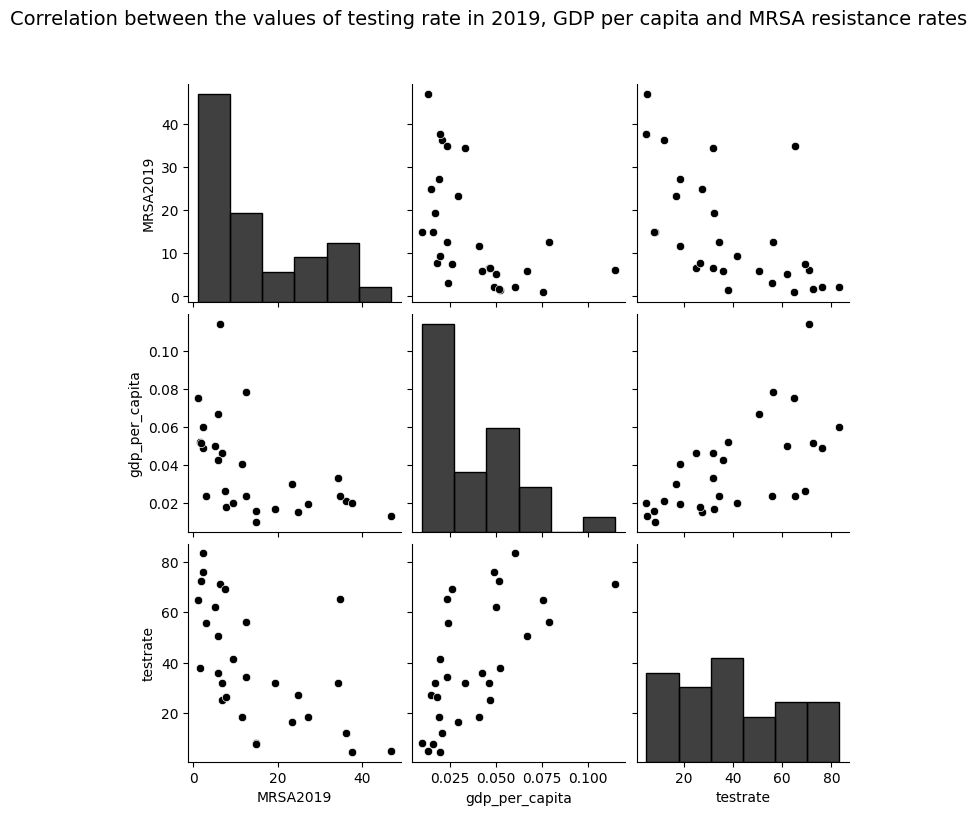

In [52]:
g = sns.pairplot(merged2)
g.fig.suptitle("Correlation between the values of testing rate in 2019, GDP per capita and MRSA resistance rates", y=1.08, fontsize=14)
plt.savefig('/content/drive/MyDrive/Python_assessment/task7.png')


**The pairplot shows that there is a positive correlation between the testing rate and the GDP per capita, there is a negative correlation between the MRSA resistance rates and the testing rate meaning that as the testing rate began to increase the resistance rate for MRSA decreased, and there is also a negative correlation between MRSA resistance rates and GDP per capita, which shows countries with higher GDP per capita are more likely to have lower MRSA resistance rates.**

Task 8:  Controlling the usage of antibiotics to where they are clinically needed can assist in preventing the emergence of resistance. The ESAC Net data contains multiple tables of data into the usage of antibiotics across Europe. Data is broken down into community use (ie you are prescribed antibiotics by your GP) and Hospital usage.
Examine the data in Excel to determine its layout and then, by reading appropriate data into data frames and processing it in your Jupyter Notebook, determine if the level of use of penicillins in the community in 2021 contributes to the prevalence of Aminopenicillin resistant pathogens and if the level of use of quinolones in the community in 2021 contributes to the prevalence of fluoroquinolone resistant pathogens



In [53]:
customer_data_file = '/content/drive/MyDrive/ESAC-Net_report_2021_downloadable_tables.xlsx'

In [54]:
excel =  pd.read_excel(customer_data_file, sheet_name='D2_J01C_AC', usecols=['Country name', '2021- Penicillins'])
print(excel)


                                         Country name  2021- Penicillins
0                                             Austria           3.467900
1                                             Belgium           7.517800
2                                            Bulgaria           4.788300
3                                             Croatia           6.871300
4                                              Cyprus                NaN
5                                             Czechia           3.784000
6                                             Denmark           8.230000
7                                             Estonia           3.211000
8                                             Finland           2.971000
9                                              France          11.032000
10                                            Germany           2.836000
11                                             Greece           7.447000
12                                            Hunga

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [55]:
excel2 =  pd.read_excel(customer_data_file, sheet_name='D6_J01M_AC', usecols=['Country name', '2021- Quinolones'])
print(excel2)


                                         Country name  2021- Quinolones
0                                             Austria          0.515000
1                                             Belgium          0.445000
2                                            Bulgaria          3.918000
3                                             Croatia          1.441000
4                                              Cyprus               NaN
5                                             Czechia          0.477000
6                                             Denmark          0.316000
7                                             Estonia          0.592000
8                                             Finland          0.364000
9                                              France          0.991000
10                                            Germany          0.434000
11                                             Greece          2.163000
12                                            Hungary          1

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [56]:
Amino=AMR_df[AMR_df['Antimicrobial'].isin(['Aminopenicillins'])]
Amino_df=Amino[Amino['Time'].isin([2021])]
Amino_df1=Amino_df[Amino_df['Indicator'].isin(['R - resistant isolates, percentage'])]
Amino_df1=Amino_df1.drop(columns=['Unnamed: 0', 'Pathogen', 'Antimicrobial', 'Indicator', 'Unit'])
Amino_df1[Amino_df1 == '-'] = np.nan
Amino_df1['NumValue']=Amino_df1['NumValue'].astype(float)
Aminodf = Amino_df1.pivot_table(index=['RegionName'],values=['NumValue'],aggfunc='sum')

In [57]:
print(Amino_df1)

       Time RegionName   NumValue
7222   2021    Austria   4.756512
7223   2021    Belgium   0.421941
7224   2021   Bulgaria   1.052632
7225   2021     Cyprus   1.438849
7226   2021    Czechia   0.918635
...     ...        ...        ...
26750  2021   Portugal  52.730442
26751  2021    Romania  64.204545
26752  2021     Sweden        NaN
26753  2021   Slovenia  50.803093
26754  2021   Slovakia  54.545455

[87 rows x 3 columns]


In [58]:
print(Aminodf)

               NumValue
RegionName             
Austria      139.426796
Belgium      144.405693
Bulgaria     162.269362
Croatia      155.987134
Cyprus       160.881631
Czechia      148.895897
Denmark      134.804209
Estonia      129.833938
Finland      115.232558
France       129.345629
Germany      140.400144
Greece       157.756022
Hungary      157.214831
Iceland       46.570397
Ireland      158.380695
Italy        149.966205
Latvia       150.222176
Lithuania    169.673799
Luxembourg   139.615987
Malta        159.285337
Netherlands  133.373974
Norway       110.621591
Poland       158.558242
Portugal     139.382872
Romania      159.289031
Slovakia     152.708532
Slovenia     143.984962
Spain        143.534976
Sweden        83.987623


In [59]:
penicillin_merge = excel.merge(Aminodf, how='right', left_on='Country name', right_on='RegionName')


In [60]:
print(penicillin_merge)

   Country name  2021- Penicillins    NumValue
0       Austria             3.4679  139.426796
1       Belgium             7.5178  144.405693
2      Bulgaria             4.7883  162.269362
3       Croatia             6.8713  155.987134
4        Cyprus                NaN  160.881631
5       Czechia             3.7840  148.895897
6       Denmark             8.2300  134.804209
7       Estonia             3.2110  129.833938
8       Finland             2.9710  115.232558
9        France            11.0320  129.345629
10      Germany             2.8360  140.400144
11       Greece             7.4470  157.756022
12      Hungary             3.2840  157.214831
13      Iceland             7.4970   46.570397
14      Ireland             7.2150  158.380695
15        Italy             7.1210  149.966205
16       Latvia             3.5430  150.222176
17    Lithuania             5.4510  169.673799
18   Luxembourg             5.9930  139.615987
19        Malta             5.4990  159.285337
20  Netherlan

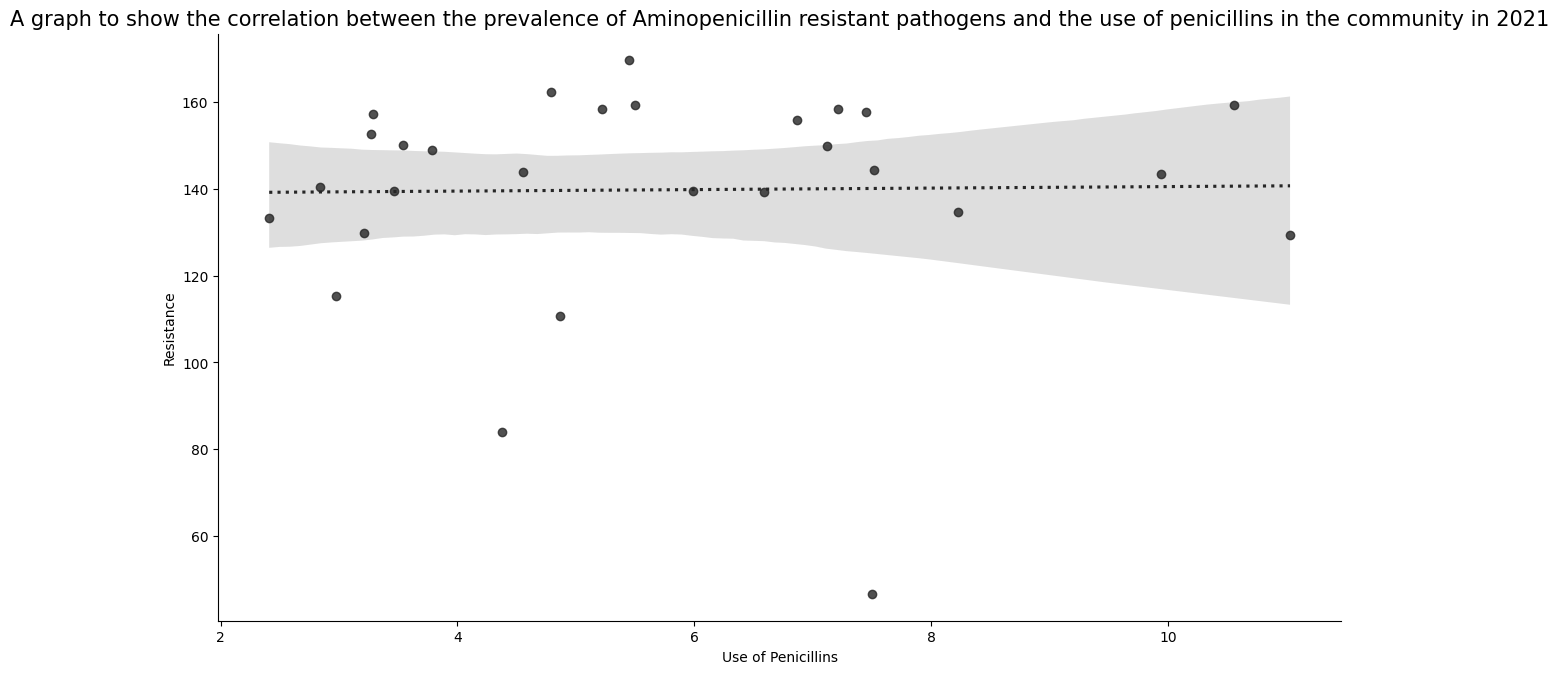

In [61]:
penicillin = sns.pairplot(penicillin_merge, kind='reg', y_vars='NumValue', x_vars='2021- Penicillins')
penicillin.fig.set_size_inches(16,8)
plt.title("A graph to show the correlation between the prevalence of Aminopenicillin resistant pathogens and the use of penicillins in the community in 2021", fontsize=15)
plt.xlabel(('Use of Penicillins'))
plt.ylabel(('Resistance'))
plt.savefig('/content/drive/MyDrive/Python_assessment/task8.png')
plt.show()


**We can see here that there is a direct correlation netween the use of penicllins in the commjunity and the prevalence of Aminpenicillin resistant pathogens.**

In [62]:
fluoro=AMR_df[AMR_df['Antimicrobial'].isin(['Fluoroquinolones'])]
fluoro_df=fluoro[fluoro['Time'].isin([2021])]
fluoro_df1=fluoro_df[fluoro_df['Unit'].isin(['%'])]
fluoro_df1=fluoro_df1.drop(columns=['Unnamed: 0', 'Pathogen', 'Antimicrobial', 'Indicator', 'Unit'])
fluoro_df1[fluoro_df1 == '-'] = np.nan
fluoro_df1['NumValue']=fluoro_df1['NumValue'].astype(float)
fluorodf = fluoro_df1.pivot_table(index=['RegionName'],values=['NumValue'],aggfunc='sum')
fluoro2=fluoro_df1.groupby('RegionName')['NumValue'].sum()
print(fluorodf)

               NumValue
RegionName             
Austria       57.494539
Belgium       63.856929
Bulgaria     216.044089
Croatia      212.347802
Cyprus       210.350285
Czechia      142.425459
Denmark       36.426500
Estonia       46.711435
Finland       26.907715
France        61.069981
Germany       41.196762
Greece       246.819613
Hungary      173.583005
Iceland       20.690433
Ireland       44.174129
Italy        189.219281
Latvia       170.333595
Lithuania    169.013949
Luxembourg    68.990655
Malta         74.155474
Netherlands   35.268061
Norway        30.610919
Poland       228.417995
Portugal      99.926515
Romania      231.506468
Slovakia     210.895990
Slovenia     130.991890
Spain        133.219262
Sweden        36.891832


In [63]:
quinolones_merge = excel2.merge(fluoro2, how='right', left_on='Country name', right_on='RegionName')
print(quinolones_merge)

   Country name  2021- Quinolones    NumValue
0       Austria             0.515   57.494539
1       Belgium             0.445   63.856929
2      Bulgaria             3.918  216.044089
3       Croatia             1.441  212.347802
4        Cyprus               NaN  210.350285
5       Czechia             0.477  142.425459
6       Denmark             0.316   36.426500
7       Estonia             0.592   46.711435
8       Finland             0.364   26.907715
9        France             0.991   61.069981
10      Germany             0.434   41.196762
11       Greece             2.163  246.819613
12      Hungary             1.420  173.583005
13      Iceland             0.451   20.690433
14      Ireland             0.375   44.174129
15        Italy             1.616  189.219281
16       Latvia             0.706  170.333595
17    Lithuania             0.659  169.013949
18   Luxembourg             1.261   68.990655
19        Malta             1.312   74.155474
20  Netherlands             0.642 

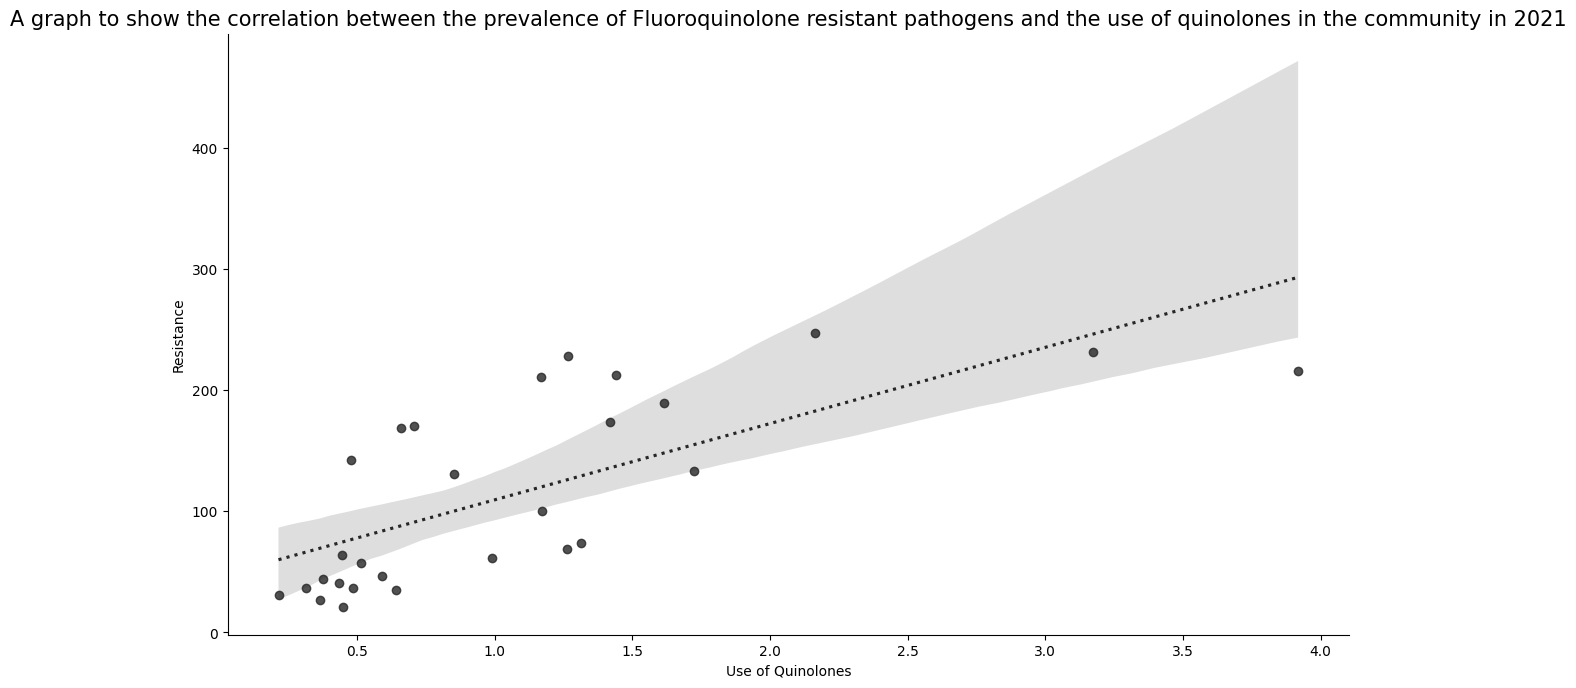

In [64]:
quinolones= sns.pairplot(quinolones_merge, kind='reg', y_vars='NumValue', x_vars='2021- Quinolones')
quinolones.fig.set_size_inches(16,8)
plt.title("A graph to show the correlation between the prevalence of Fluoroquinolone resistant pathogens and the use of quinolones in the community in 2021", fontsize=15)
plt.xlabel(('Use of Quinolones'))
plt.ylabel(('Resistance'))
plt.savefig('/content/drive/MyDrive/Python_assessment/task8_2.png')
plt.show()


**We can see here that there is a direct correlation between the use of quinolones in the community and the prevalence of Fluoroquinolone resistant pathogens.**

Task 9: Based on your analysis comment on the characteristics of countries in Europe that are maintaining low levels of AMR and any challenges in adopting such practices globally

**The countries which are maintaining low levels of AMR are using less quinolones and penicillins as it prevents the prevalence of creating pathogens which become resistant. Although this is a good thing, the use of these are sometimes necessary in order to ensure that the prevalence of the Antimicrobials is not high and people are being treated. Therefore, some sort of compromise should be made, but it is still recommended from the analysis that the use of the medication in the community should at first be decreased to reduce AMR. We should be looking at countries such as the United kingdom, whose MRSA incidence rate has decreased over time and what kind of things have been adopted by countries like these. Some challenges that countries may face is that there is a correlation between a countries GDP per capita and the resistance rates, unlike the UK who have a higher GDP per capita, so countries that are lower may find it difficult to adopt the same practices due to funds or their national healthcare system. This is further demonstrated by the correlation of testing rates and the resistance rate of pathogens. It is seen that countries with higher testing rates have a lower resistance rate and some countries whcih have highest resistance rates such as Romania have low GDP per capita, so it can be the case where countries such as these have difficulty with introducing more testing for these antimicrobials.**